# EQUITY ASIAN OPTIONS - VALUATION ANALYSIS

Valuation and Risk of Asian-style options. Detailed analysis of different valuation models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.market.curves import *
from financepy.products.equity import *

####################################################################
# FINANCEPY BETA Version 0.180 - This build:  22 Sep 2020 at 22:58 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#    For bug reports and comments - allmypythonprojects@gmail.com  #
####################################################################



# Define the Call and Put Options

In [3]:
startAveragingDate = FinDate(1, 1, 2020)

In [4]:
expiryDate = FinDate(1, 1, 2021)

In [5]:
strikePrice = 100.0

Assume daily observations

In [6]:
numObservations = (expiryDate - startAveragingDate)

In [7]:
asianOption = FinEquityAsianOption(startAveragingDate, 
                                   expiryDate, 
                                   strikePrice, 
                                   FinOptionTypes.EUROPEAN_CALL, 
                                   numObservations)

In [8]:
print(asianOption)

OBJECT TYPE: FinEquityAsianOption
START AVERAGING DATE: WED 01 JAN 2020
EXPIRY DATE: FRI 01 JAN 2021
STRIKE PRICE: 100.0
OPTION TYPE: FinOptionTypes.EUROPEAN_CALL
NUM OBSERVATIONS: 366


## Valuation - Before Averaging Period

In [8]:
valueDate = FinDate(1,1,2019)

In [9]:
stockPrice = 100.0
volatility = 0.20
interestRate = 0.05
dividendYield = 0.01

In [10]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate)

In [11]:
numObservations

366

In [12]:
model = FinEquityModelBlackScholes(volatility)
seed = 42
accruedAverage = None

There are a number of valuation approximations to the arithmetic average (AA) option (which does not have an analytical solution)

First we have the Geometric Average (GA) price. This is not the same product of course but the GA is a good approximation for the AA and a LOWER BOUND.

In [17]:
asianOption.value(valueDate, stockPrice, discountCurve, dividendYield, model, 
                  FinAsianOptionValuationMethods.GEOMETRIC, accruedAverage)

11.403413712005651

Then we have Curran's approximation

In [18]:
asianOption.value(valueDate, stockPrice, discountCurve, dividendYield, model, 
                  FinAsianOptionValuationMethods.CURRAN, accruedAverage)

11.627609054064765

There is also Turnbull and Wakeman's approximation

In [19]:
asianOption.value(valueDate, stockPrice, discountCurve, dividendYield, model, 
                  FinAsianOptionValuationMethods.TURNBULL_WAKEMAN, accruedAverage)

11.628924864121391

Or we can do it using Monte Carlo

In [20]:
numPath = 100000

In [21]:
asianOption.valueMC(valueDate, stockPrice, discountCurve, dividendYield, model, 
                    numPath, seed, accruedAverage)

11.619290831574155

Pricing is all clustered around 11.62.

## Convergence Test Before the Averaging Period

In [22]:
numPaths = np.linspace(10000,20000,20)
seed = 1219

In [26]:
values = []
for numPath in numPaths:
    numPath = int(numPath)
    v = asianOption.valueMC(valueDate, stockPrice, discountCurve, dividendYield, model, numPath, seed, accruedAverage)
    values.append(v)

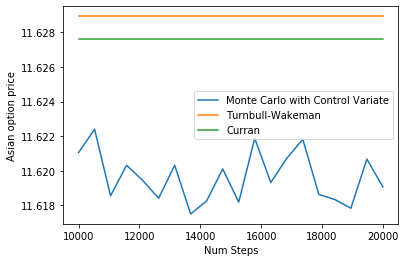

In [27]:
plt.plot(numPaths, values, label="Monte Carlo with Control Variate")
plt.xlabel("Num Steps")
plt.ylabel("Asian option price")
plt.plot(numPaths, [v_tw] * len(numPaths), label = "Turnbull-Wakeman")
plt.plot(numPaths, [v_c] * len(numPaths), label = "Curran")
plt.legend()

Recall that the source of the difference is that the analytical models are unable to exactly match the true arithmetic average distribution. In addition, a smaller effect is that they assume continuous monitoring of the barrier.

## Valuation - In the Averaging Period

Once we are in the averaging period we need to track the average from the start of the averaging period to the value date

In [28]:
valueDate = FinDate(1, 6, 2020)

The stock price has increased to 105 and the average stock price has been 103.0

In [29]:
stockPrice = 105.0
volatility = 0.20
interestRate = 0.05
dividendYield = 0.01
accruedAverage = 101.0

The geometric price is once again a LOWER BOUND

In [30]:
asianOption.value(valueDate, stockPrice, discountCurve, dividendYield, model, 
                  FinAsianOptionValuationMethods.GEOMETRIC, accruedAverage)

4.500621145139036

In [31]:
asianOption.value(valueDate, stockPrice, discountCurve, dividendYield, model, 
                  FinAsianOptionValuationMethods.CURRAN, accruedAverage)

4.600840294549478

In [32]:
asianOption.value(valueDate, stockPrice, discountCurve, dividendYield, model, 
                  FinAsianOptionValuationMethods.TURNBULL_WAKEMAN, accruedAverage)

4.602559407629204

In [35]:
asianOption.valueMC(valueDate, stockPrice, discountCurve, dividendYield, model, 
                    numPath, seed, accruedAverage)

4.588457126165863

These are all clustered around 4.59

## Convergence Test In the Averaging Period

In [47]:
numPaths = np.linspace(1000,20000,50)
seed = 1219

In [48]:
values = []
for numPath in numPaths:
    numPath = int(numPath)
    v = asianOption.valueMC(valueDate, stockPrice, discountCurve, 
                            dividendYield, model, numPath, seed, accruedAverage)
    values.append(v)

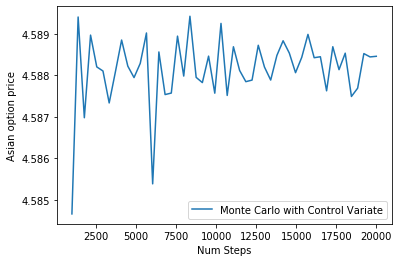

In [49]:
plt.plot(numPaths, values, label="Monte Carlo with Control Variate")
plt.xlabel("Num Steps")
plt.ylabel("Asian option price")
plt.legend()

Recall that the source of the difference is that the analytical models are unable to exactly match the true arithmetic average distribution. In addition, a smaller effect is that they assume continuous monitoring of the barrier. 

Copyright (c) 2020 Dominic O'Kane